In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [14]:
simplreg = pd.read_csv("datasets/simplreg.txt", delimiter="\t")
fruitohms = pd.read_csv("datasets/fruitohms.txt", delimiter=" ")

print(simplreg)
print(simplreg.info())
print(simplreg.describe())
print("\n")
print(fruitohms)
print(fruitohms.info())
print(fruitohms.describe())

     X      Y
0   25  350.0
1   30  348.4
2   35  337.0
3   40  330.8
4   45  315.8
5   50  305.4
6   55  280.7
7   60  248.0
8   65  230.4
9   70  202.3
10  75  162.5
11  80  126.0
12  85   74.6
13  90   28.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       14 non-null     int64  
 1   Y       14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 356.0 bytes
None
               X           Y
count  14.000000   14.000000
mean   57.500000  238.607143
std    20.916501  105.896593
min    25.000000   28.600000
25%    41.250000  172.450000
50%    57.500000  264.350000
75%    73.750000  327.050000
max    90.000000  350.000000


     juice  ohms
1      4.0  4860
2      5.0  5860
3      5.5  6650
4      7.5  7050
5      8.5  5960
..     ...   ...
123   58.5  3650
124   58.5  3750
125   58.5  4550
126   59.5  3300
127   60.0  3600

[128 rows x 

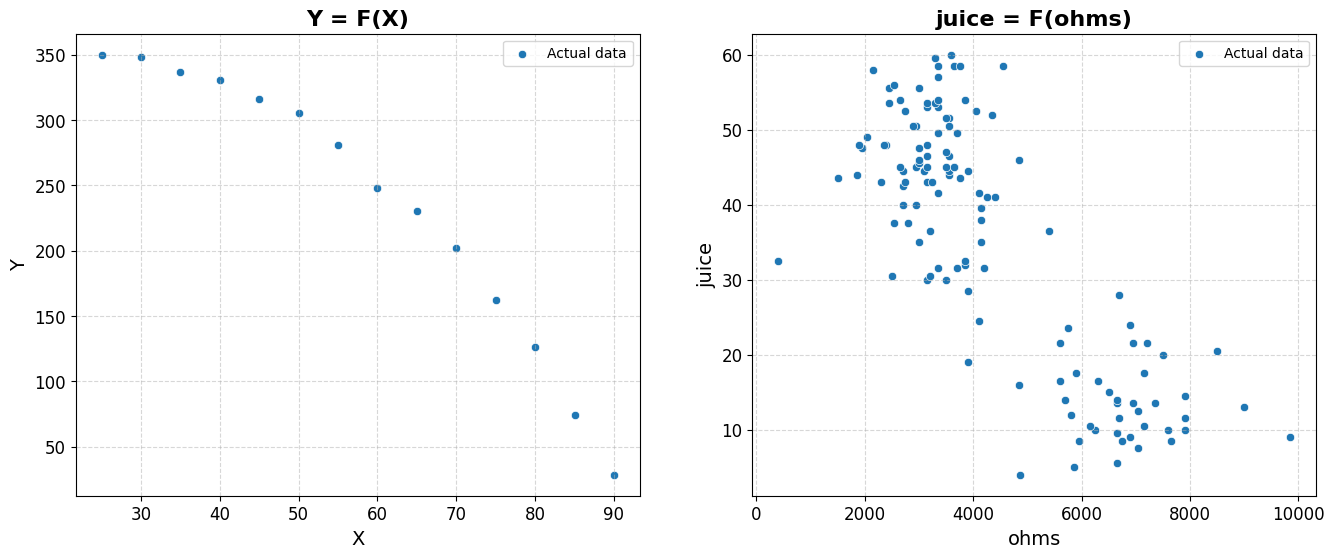

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=simplreg["X"], y=simplreg["Y"], ax=ax1, label="Actual data")
ax1.set_xlabel("X", fontsize=14)
ax1.set_ylabel("Y", fontsize=14)
ax1.set_title("Y = F(X)", fontsize=16, fontweight="bold")
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax1.grid(True, linestyle="--", alpha=0.5)

sns.scatterplot(x=fruitohms["ohms"], y=fruitohms["juice"], ax=ax2, label="Actual data")
ax2.set_xlabel("ohms", fontsize=14)
ax2.set_ylabel("juice", fontsize=14)
ax2.set_title("juice = F(ohms)", fontsize=16, fontweight="bold")
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax2.grid(True, linestyle="--", alpha=0.5)

plt.savefig("graph1.png")
plt.show()

Linear Regression MSE: 1035.8, RMSE: 32.184, MAE: 26.869, R2: 0.904


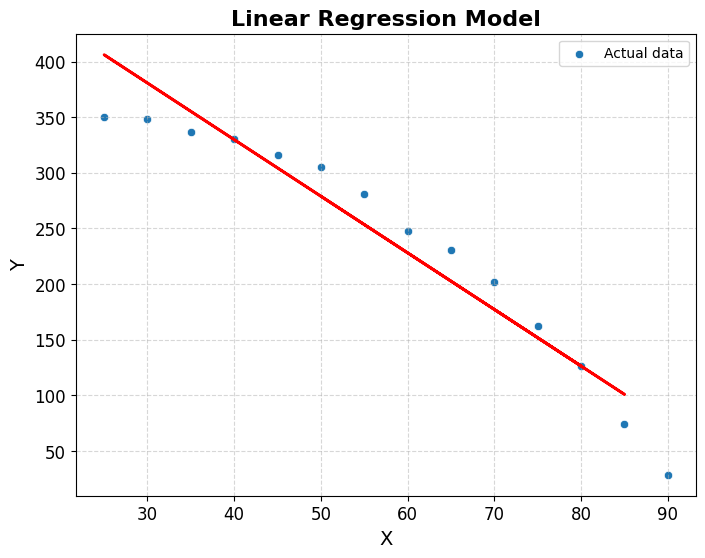

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     98.15
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.28e-05
Time:                        20:09:55   Log-Likelihood:                -41.820
No. Observations:                   9   AIC:                             87.64
Df Residuals:                       7   BIC:                             88.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.4568     29.815     17.892      0.0

c:\Users\ondre\source\repos\git\UJEP\PSM\Regression-1\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [16]:
X = simplreg["X"].values.reshape(-1, 1)
y = simplreg["Y"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(
    f"Linear Regression MSE: {np.round(mse,3)}, RMSE: {np.round(rmse,3)}, MAE: {np.round(mae,3)}, R2: {np.round(r2,3)}"
)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=simplreg["X"], y=simplreg["Y"], label="Actual data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Linear Regression")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Linear Regression Model", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Statistical evaluation of the linear model
X_train_const = sm.add_constant(X_train)
model_lin = sm.OLS(y_train, X_train_const).fit()
summary_lin = model_lin.summary()
print(summary_lin)

print("Coefficients (Linear Regression):", linear_regression.coef_)
print("Intercept (Linear Regression):", linear_regression.intercept_)

In [17]:
def get_optimal_degree(x_train, x_test, y_train, y_test):
    degrees = [2, 3, 4, 5]
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(x_train)
        X_poly_test = poly.transform(x_test)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        y_poly_pred = poly_reg.predict(X_poly_test)
        mse_poly = mean_squared_error(y_test, y_poly_pred)
        errors.append(mse_poly)

    return degrees[np.argmin(errors)]

In [18]:
def get_optimal_degree(x_train, x_test, y_train, y_test):
    degrees = [2, 3, 4, 5]
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(x_train)
        X_poly_test = poly.transform(x_test)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        y_poly_pred = poly_reg.predict(X_poly_test)
        mse_poly = mean_squared_error(y_test, y_poly_pred)
        errors.append(mse_poly)

    return degrees[np.argmin(errors)]

optimal_degree = get_optimal_degree(X_train, X_test, y_train, y_test)
print(f"Optimal degree for polynomial regression: {optimal_degree}")

polynomial_features = PolynomialFeatures(degree=optimal_degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_poly_train, y_train)
y_poly_before = polynomial_regression.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_poly_before)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_poly_before)
r2_poly = r2_score(y_test, y_poly_before)

print(
    f"Polynomial Regression MSE: {np.round(mse_poly,3)}, RMSE: {np.round(rmse_poly,3)}, MAE: {np.round(mae_poly,3)}, R2: {np.round(r2_poly,3)}"
)

Optimal degree for polynomial regression: 4
Polynomial Regression MSE: 21.997, RMSE: 4.69, MAE: 4.025, R2: 0.998


In [19]:
def plot_models(x_axis, y_axis):
    X = x_axis.values.reshape(-1, 1)
    y = y_axis.values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    degrees = [2, 3, 4, 5]
    colors = ["green", "darkblue", "magenta", "grey"]

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()

    for idx, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(X_train)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
        X_poly_grid = poly.transform(X_grid)
        y_poly_grid = poly_reg.predict(X_poly_grid)

        y_pred = poly_reg.predict(poly.transform(X_test))

        mse_lin = mean_squared_error(y_test, y_pred)
        rmse_lin = np.sqrt(mse_lin)
        mae_lin = mean_absolute_error(y_test, y_pred)
        r2_lin = r2_score(y_test, y_pred)

        sns.scatterplot(x=x_axis, y=y_axis, label="Actual data", ax=axs[idx])
        axs[idx].plot(
            X_grid,
            y_poly_grid,
            color=colors[idx],
            linewidth=2,
            label=f"Regression (degree={degree})",
        )
        axs[idx].set_title(
            f"Regression (degree={degree})", fontsize=14, fontweight="bold"
        )
        axs[idx].grid(True, linestyle="--", alpha=0.5)
        axs[idx].legend()
        axs[idx].text(
            0.81,
            0.69,
            f"MSE: {np.round(mse_lin, 3)}\nRMSE: {np.round(rmse_lin, 3)}\nMAE: {np.round(mae_lin, 3)}\nR²: {np.round(r2_lin, 3)}",
            transform=axs[idx].transAxes,
            fontsize=10,
            verticalalignment="bottom",
            horizontalalignment="left",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

    plt.tight_layout()
    plt.savefig(f"graph2-{x_axis.name}_{y_axis.name}.png")
    plt.show()

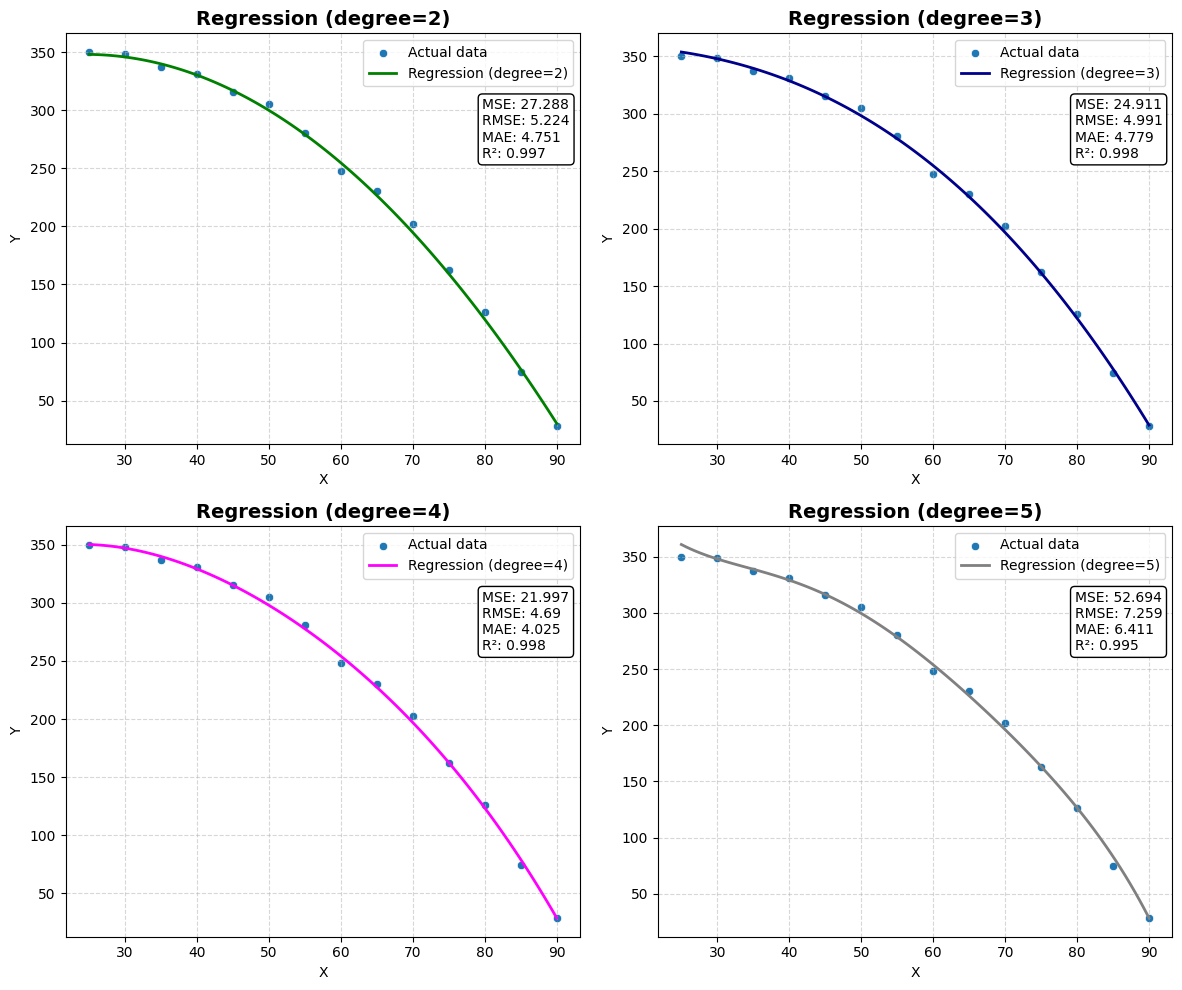

In [20]:
plot_models(x_axis=simplreg["X"], y_axis=simplreg["Y"])

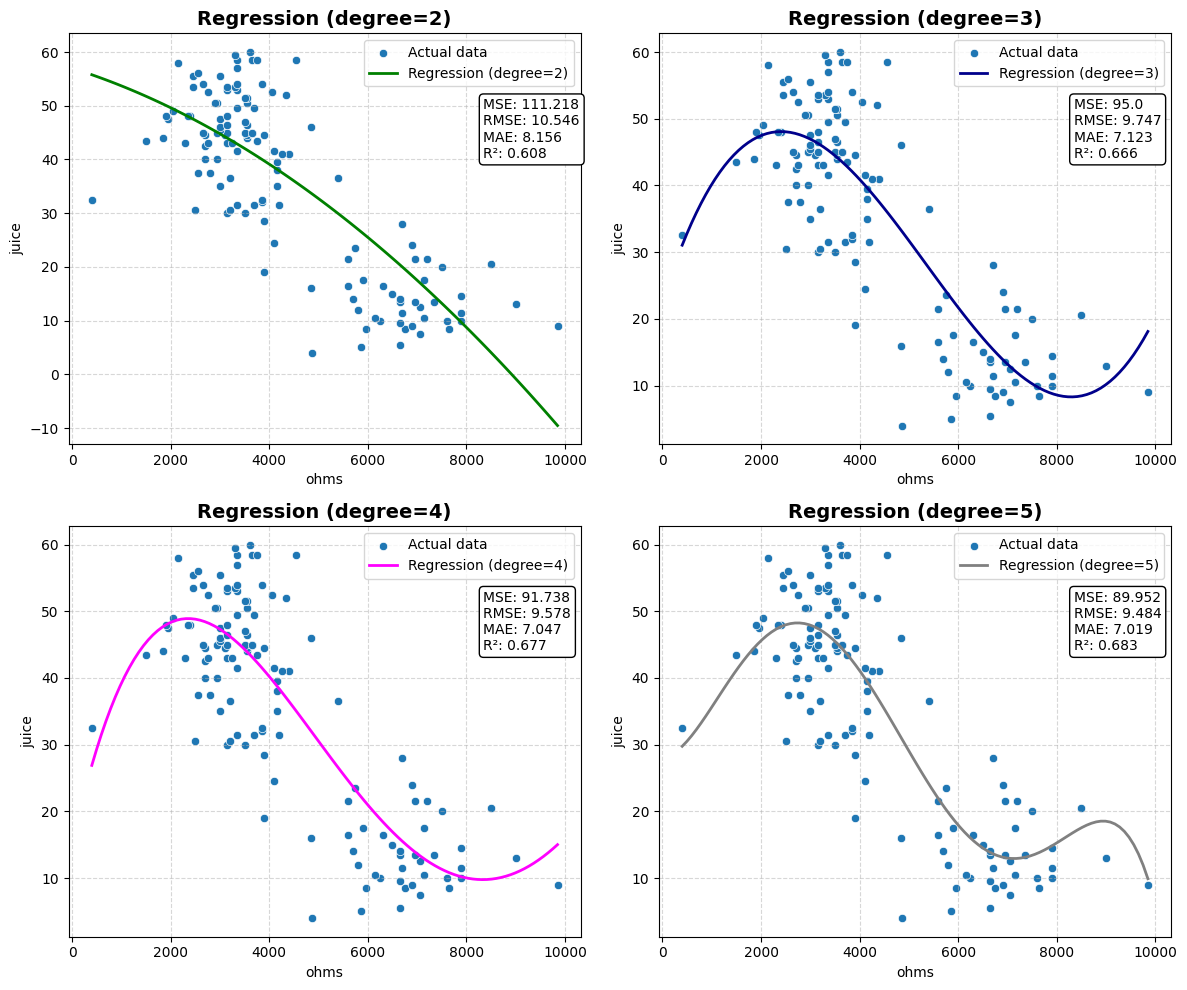

In [21]:
plot_models(x_axis=fruitohms["ohms"], y_axis=fruitohms["juice"])

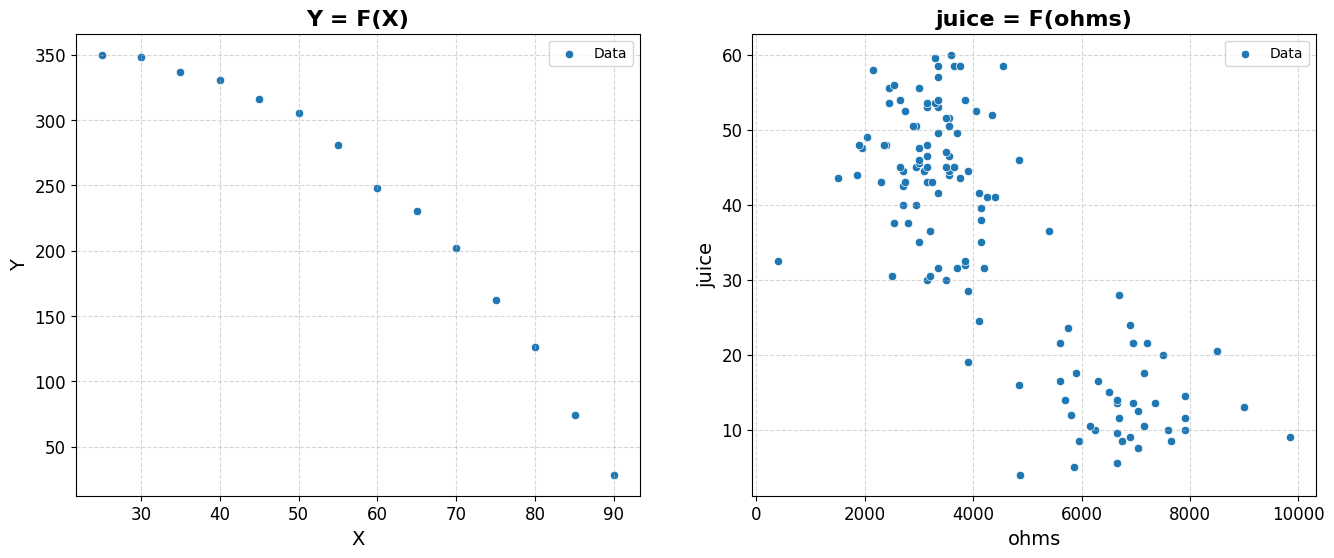

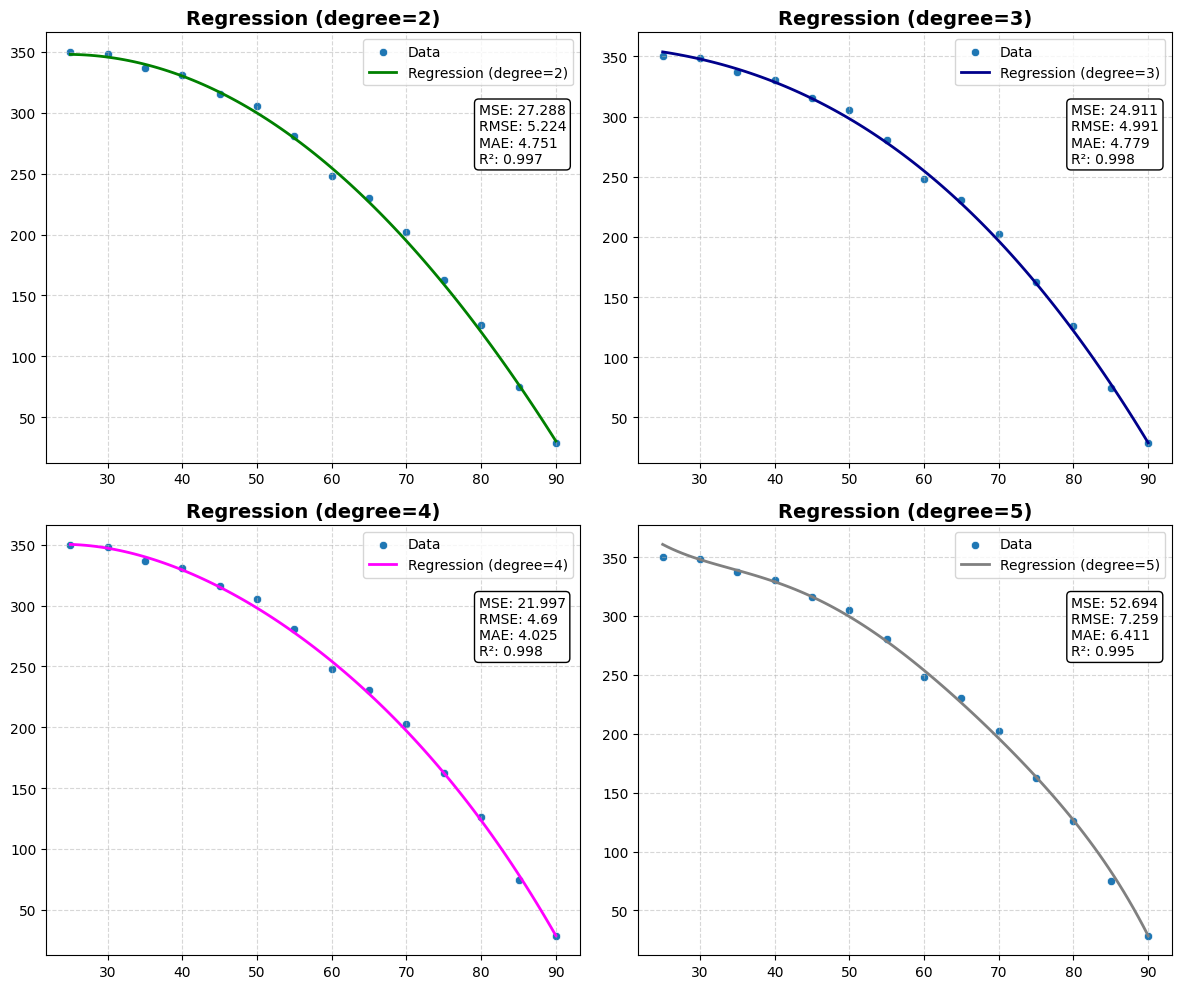

Optimal degree: 4


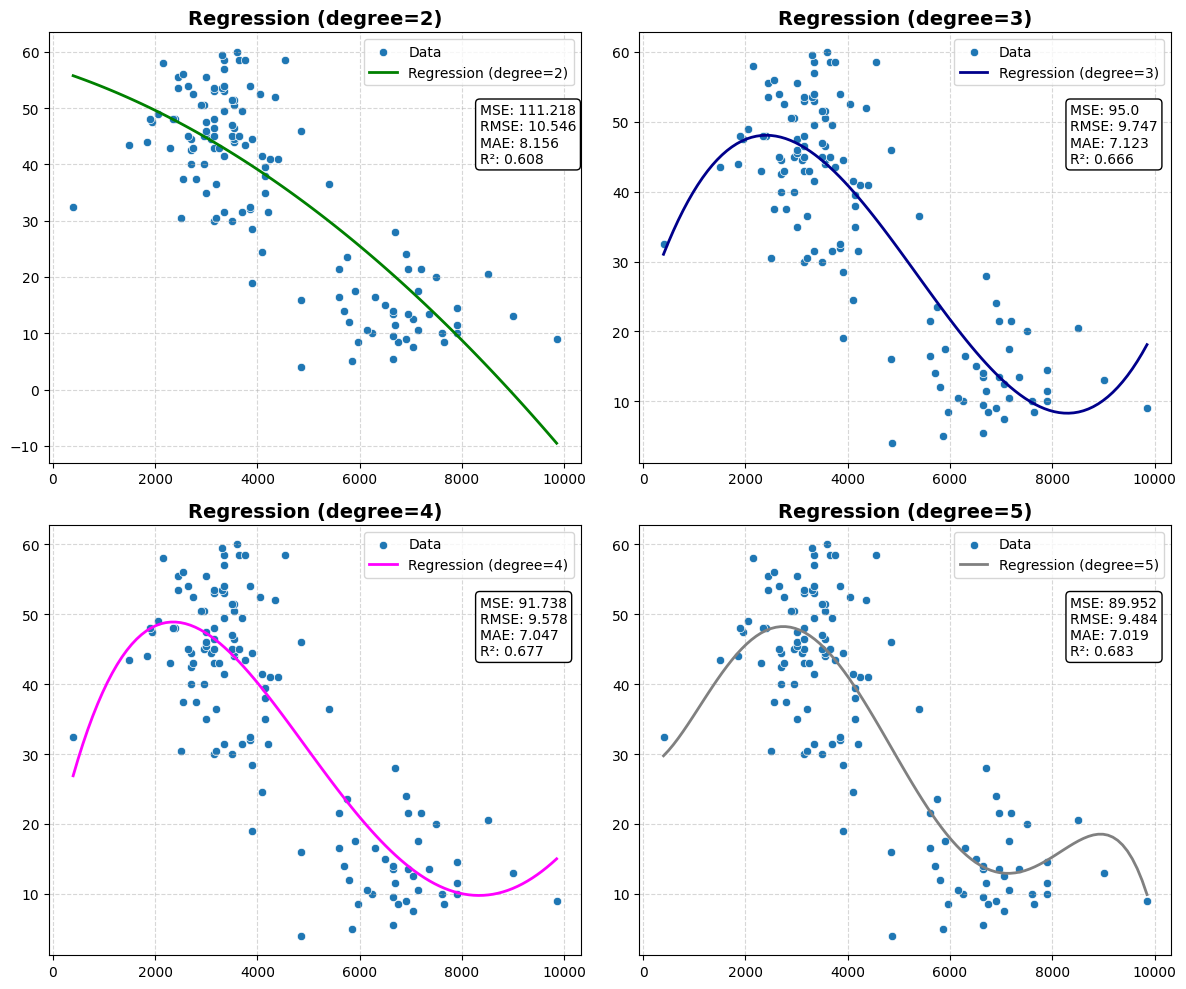

Optimal degree: 5


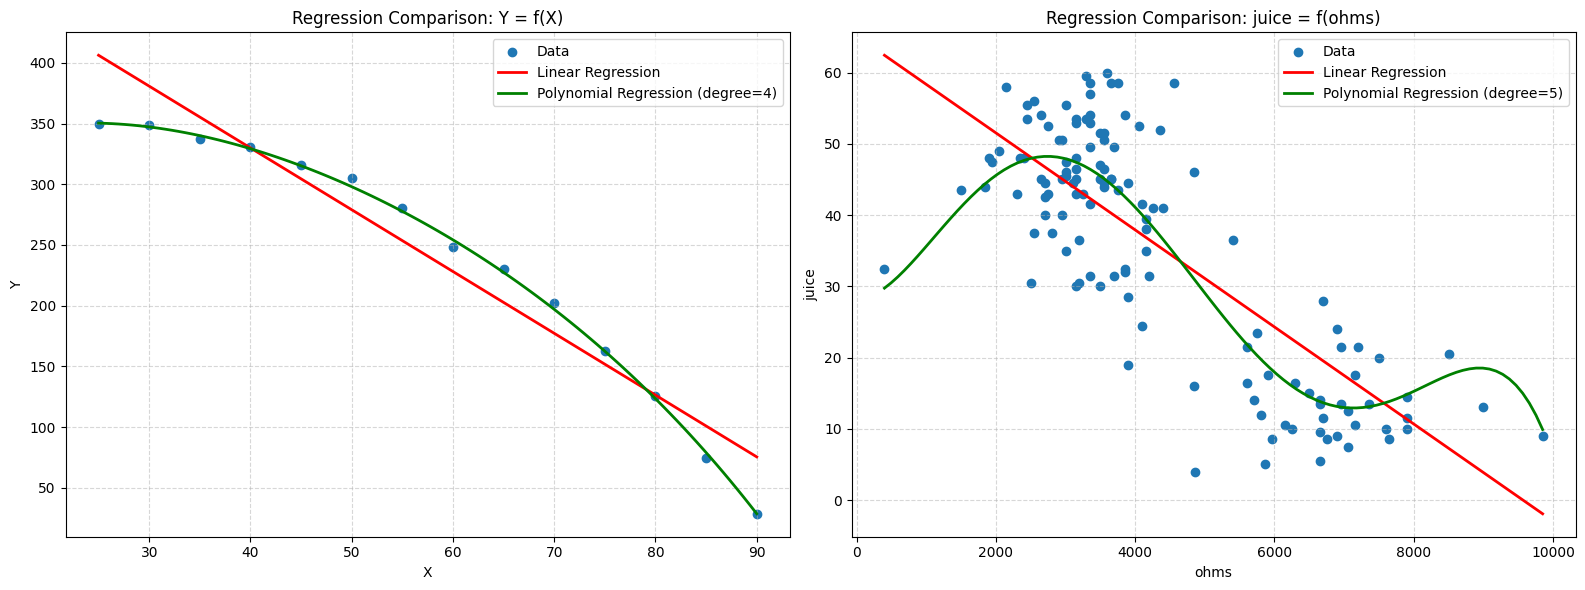

In [22]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def load_simplreg():
    path = "datasets/simplreg.txt" if "google.colab" not in sys.modules else "/content/drive/MyDrive/2024_2025/PSM_2024_2025/Regression_1/Datasets/simplreg.txt"
    return pd.read_csv(path, delimiter="\t")

def load_fruitohms():
    path = "datasets/fruitohms.txt" if "google.colab" not in sys.modules else "/content/drive/MyDrive/2024_2025/PSM_2024_2025/Regression_1/Datasets/fruitohms.txt"
    return pd.read_csv(path, delimiter=" ")

# ----------- 1. Task -----------

simplreg = load_simplreg()
fruitohms = load_fruitohms()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=simplreg["X"], y=simplreg["Y"], ax=ax1, label="Data")
ax1.set_xlabel("X", fontsize=14)
ax1.set_ylabel("Y", fontsize=14)
ax1.set_title("Y = F(X)", fontsize=16, fontweight="bold")
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax1.grid(True, linestyle="--", alpha=0.5)

sns.scatterplot(x=fruitohms["ohms"], y=fruitohms["juice"], ax=ax2, label="Data")
ax2.set_xlabel("ohms", fontsize=14)
ax2.set_ylabel("juice", fontsize=14)
ax2.set_title("juice = F(ohms)", fontsize=16, fontweight="bold")
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax2.grid(True, linestyle="--", alpha=0.5)

plt.savefig("1_1_datasets.png")
plt.show()

# ----------- 2. Task -----------

TRAIN_TEST_SPLIT_RATIO = 0.3
POLYNOMIAL_DEGREES = [2, 3, 4, 5]

def plot_models(X, y, filename):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_SPLIT_RATIO, random_state=42)

    degrees_and_colors = {2: "green", 3: "darkblue", 4: "magenta", 5: "grey"}
    _, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()

    for idx, (degree, color) in enumerate(degrees_and_colors.items()):
        polynomial_features = PolynomialFeatures(degree)
        X_poly_train = polynomial_features.fit_transform(X_train)
        polynomial_regression = LinearRegression().fit(X_poly_train, y_train)
        X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_poly_grid = polynomial_regression.predict(polynomial_features.transform(X_grid))
        y_pred = polynomial_regression.predict(polynomial_features.transform(X_test))

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        sns.scatterplot(x=X.ravel(), y=y, ax=axs[idx], label="Data")
        axs[idx].plot(X_grid, y_poly_grid, color=color, linewidth=2, label=f"Regression (degree={degree})")
        axs[idx].set_title(f"Regression (degree={degree})", fontsize=14, fontweight="bold")
        axs[idx].grid(True, linestyle="--", alpha=0.5)
        axs[idx].legend()
        axs[idx].text(
            0.81, 0.69,
            f"MSE: {np.round(mse, 3)}\nRMSE: {np.round(rmse, 3)}\nMAE: {np.round(mae, 3)}\nR²: {np.round(r2, 3)}",
            transform=axs[idx].transAxes, fontsize=10, verticalalignment="bottom",
            horizontalalignment="left",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
        )
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    print(f"Optimal degree: {get_optimal_degree(X_train, X_test, y_train, y_test)}")

def get_optimal_degree(x_train, x_test, y_train, y_test):
    degrees = [2, 3, 4, 5]
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(x_train)
        X_poly_test = poly.transform(x_test)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        y_poly_pred = poly_reg.predict(X_poly_test)
        mse_poly = mean_squared_error(y_test, y_poly_pred)
        errors.append(mse_poly)

    return degrees[np.argmin(errors)]

X_simplreg = simplreg["X"].values.reshape(-1, 1)
y_simplreg = simplreg["Y"].values
plot_models(X_simplreg, y_simplreg, filename="1_2_simplreg")

X_fruitohms = fruitohms["ohms"].values.reshape(-1, 1)
y_fruitohms = fruitohms["juice"].values
plot_models(X_fruitohms, y_fruitohms, filename="1_2_fruitohms")

# ----------- 3. Task -----------

def plot_best_regression_models(X1, y1, X2, y2, filename = "1_3_overview.png"):
    # --- Dataset 1 ---
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=TRAIN_TEST_SPLIT_RATIO, random_state=42)
    best_degree1 = get_optimal_degree(X_train1, X_test1, y_train1, y_test1)
    poly_feat1 = PolynomialFeatures(best_degree1)
    X_poly_train1 = poly_feat1.fit_transform(X_train1)
    poly_model1 = LinearRegression().fit(X_poly_train1, y_train1)
    lin_model1 = LinearRegression().fit(X_train1, y_train1)
    X_grid1 = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
    y_lin_grid1 = lin_model1.predict(X_grid1)
    y_poly_grid1 = poly_model1.predict(poly_feat1.transform(X_grid1))

    # --- Dataset 2 ---
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=TRAIN_TEST_SPLIT_RATIO, random_state=42)
    best_degree2 = get_optimal_degree(X_train2, X_test2, y_train2, y_test2)
    poly_feat2 = PolynomialFeatures(best_degree2)
    X_poly_train2 = poly_feat2.fit_transform(X_train2)
    poly_model2 = LinearRegression().fit(X_poly_train2, y_train2)
    lin_model2 = LinearRegression().fit(X_train2, y_train2)
    X_grid2 = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
    y_lin_grid2 = lin_model2.predict(X_grid2)
    y_poly_grid2 = poly_model2.predict(poly_feat2.transform(X_grid2))

    # --- Plotting ---
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot for dataset 1
    ax1.scatter(X1, y1, label="Data")
    ax1.plot(X_grid1, y_lin_grid1, color="red", linewidth=2, label="Linear Regression")
    ax1.plot(X_grid1, y_poly_grid1, color="green", linewidth=2,
             label=f"Polynomial Regression (degree={best_degree1})")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Regression Comparison: Y = f(X)")
    ax1.grid(True, linestyle="--", alpha=0.5)
    ax1.legend()

    # Subplot for dataset 2
    ax2.scatter(X2, y2, label="Data")
    ax2.plot(X_grid2, y_lin_grid2, color="red", linewidth=2, label="Linear Regression")
    ax2.plot(X_grid2, y_poly_grid2, color="green", linewidth=2,
             label=f"Polynomial Regression (degree={best_degree2})")
    ax2.set_xlabel("ohms")
    ax2.set_ylabel("juice")
    ax2.set_title("Regression Comparison: juice = f(ohms)")
    ax2.grid(True, linestyle="--", alpha=0.5)
    ax2.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

plot_best_regression_models(X1=X_simplreg, y1=y_simplreg, X2=X_fruitohms, y2=y_fruitohms)

Columns in dataset: ['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']
Degree 1 - MSE: 98.604, RMSE: 9.93, MAE: 5.683, R2: 0.508
Degree 2 - MSE: 29.076, RMSE: 5.392, MAE: 3.128, R2: 0.855
Degree 3 - MSE: 9.093, RMSE: 3.015, MAE: 1.809, R2: 0.955
Degree 4 - MSE: 4.406, RMSE: 2.099, MAE: 1.136, R2: 0.978
Degree 5 - MSE: 1.849, RMSE: 1.36, MAE: 0.733, R2: 0.991
Degree 6 - MSE: 0.75, RMSE: 0.866, MAE: 0.488, R2: 0.996
Degree 7 - MSE: 0.285, RMSE: 0.534, MAE: 0.313, R2: 0.999
Degree 8 - MSE: 0.098, RMSE: 0.313, MAE: 0.189, R2: 1.0
Degree 9 - MSE: 0.035, RMSE: 0.188, MAE: 0.113, R2: 1.0


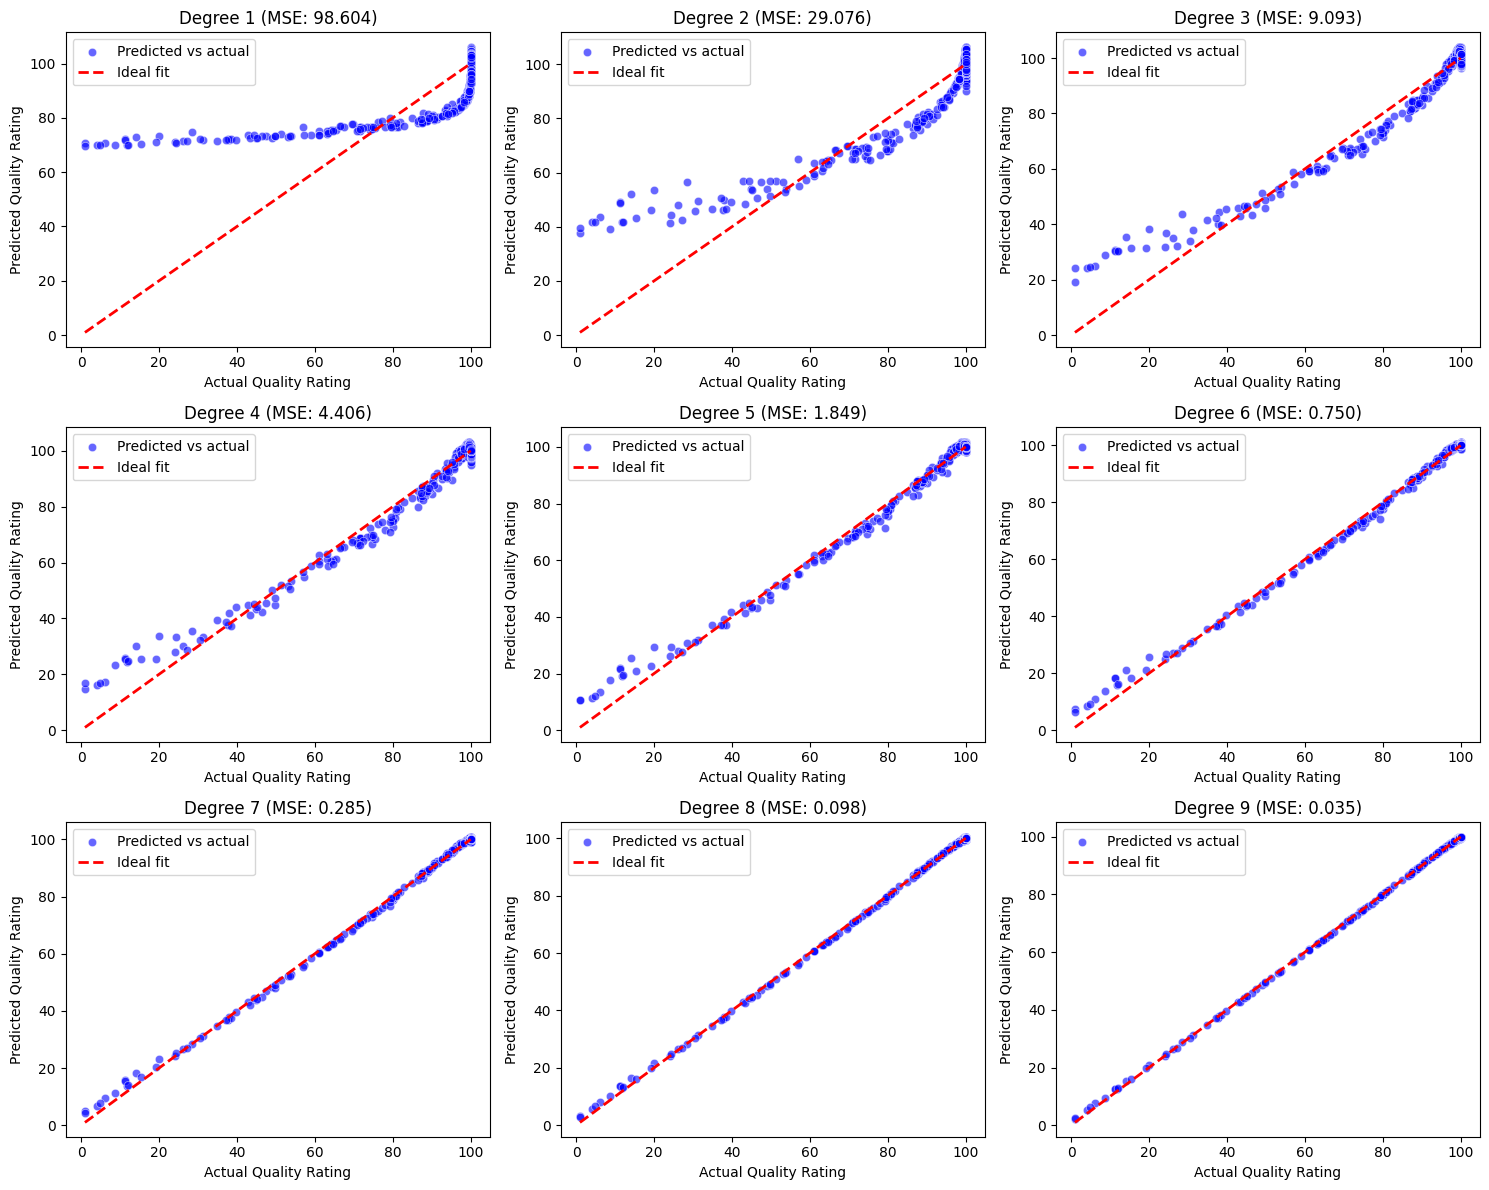

Optimal degree: 9


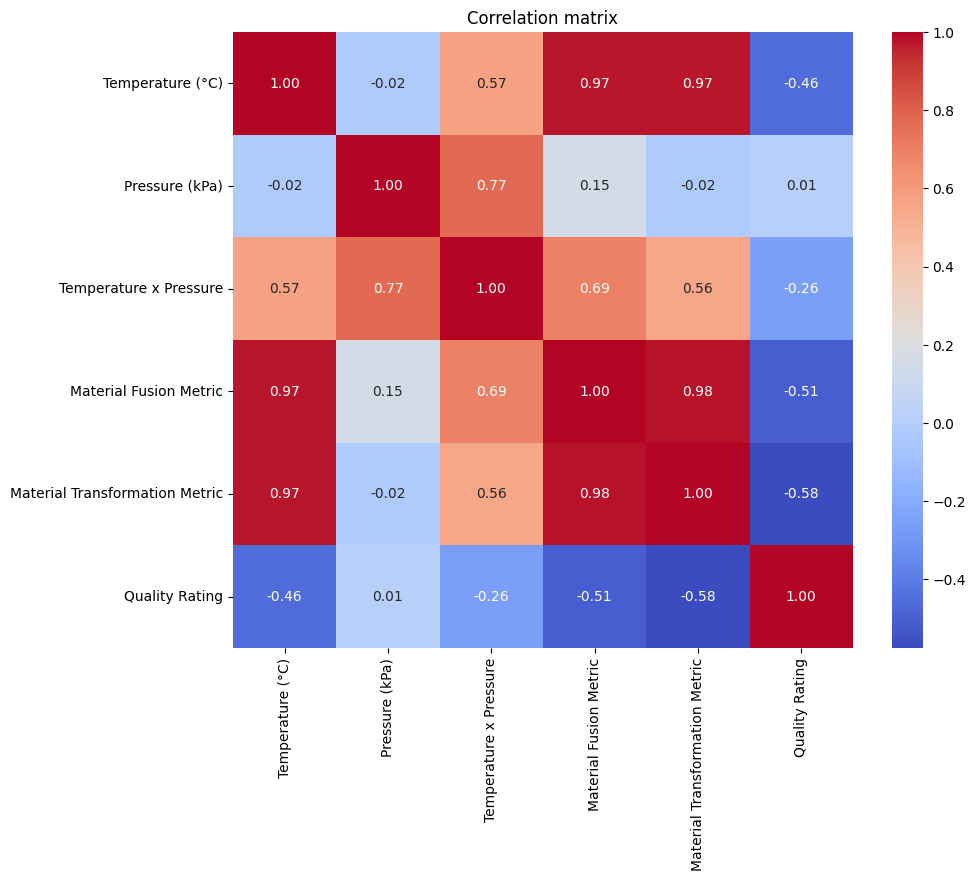

Best degree for 'Temperature (°C)': 9
Best degree for 'Pressure (kPa)': 5
Best degree for 'Temperature x Pressure': 8
Best degree for 'Material Fusion Metric': 9
Best degree for 'Material Transformation Metric': 9


In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

DEGREES = [1, 2, 3, 4, 5, 6, 7, 8, 9]

def load_manufacturing():
    path = "datasets/manufacturing.csv" if "google.colab" not in sys.modules else "/content/drive/MyDrive/2024_2025/PSM_2024_2025/Regression_1/Datasets/manufacturing.csv"
    return pd.read_csv(path, delimiter=",")

def get_optimal_degree(x_train, x_test, y_train, y_test, degrees=DEGREES):
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(x_train)
        X_poly_test = poly.transform(x_test)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, y_train)

        y_poly_pred = poly_reg.predict(X_poly_test)
        mse_poly = mean_squared_error(y_test, y_poly_pred)
        errors.append(mse_poly)

    return degrees[np.argmin(errors)]

def train_and_plot_poly_models(X, y, degrees=DEGREES, test_size = 0.3, random_state = 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    n_degrees = len(degrees)
    n_cols = 3
    n_rows = int(np.ceil(n_degrees / n_cols))

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axs = axs.ravel()

    for idx, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        model = LinearRegression().fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Degree {degree} - MSE: {np.round(mse,3)}, RMSE: {np.round(rmse,3)}, MAE: {np.round(mae,3)}, R2: {np.round(r2,3)}")

        ax = axs[idx]
        sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, ax=ax, label="Predicted vs actual")
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal fit")
        ax.set_xlabel("Actual Quality Rating")
        ax.set_ylabel("Predicted Quality Rating")
        ax.set_title(f"Degree {degree} (MSE: {mse:.3f})")
        ax.legend()

    # Remove any unused subplots
    for j in range(idx + 1, n_rows * n_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.savefig("2_overview.png")
    plt.show()
    print(f"Optimal degree: {get_optimal_degree(X_train, X_test, y_train, y_test)}")

def train_and_evaluate_poly_models(X_col, y, degrees=DEGREES):
    X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.3, random_state=42)
    errors = []

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        model = LinearRegression().fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        errors.append((degree, mse, r2))

    return errors


manufacturing = load_manufacturing()
print("Columns in dataset:", manufacturing.columns.tolist())

# Use all columns except "Quality Rating" as predictors.
X = manufacturing.drop(columns=["Quality Rating"])
y = manufacturing["Quality Rating"].values

train_and_plot_poly_models(X, y)

plt.figure(figsize=(10, 8))
sns.heatmap(manufacturing.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.savefig("2_correlation_matrix.png")
plt.show()

results = {}
for col in X.columns:
    errors = train_and_evaluate_poly_models(X[[col]], y)
    results[col] = errors

best_models = {}
for col, errors in results.items():
    best_degree = sorted(errors, key=lambda x: x[1])[0][0]  # Best according to MSE
    best_models[col] = best_degree
    print(f"Best degree for '{col}': {best_degree}")

Optimized parameters misrala [a, b]: [2.38942130e+02 5.50156429e-04]


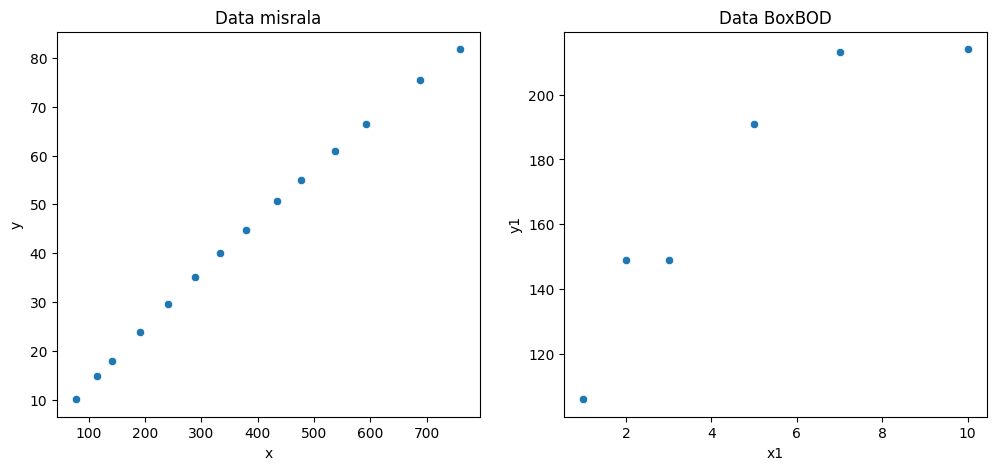

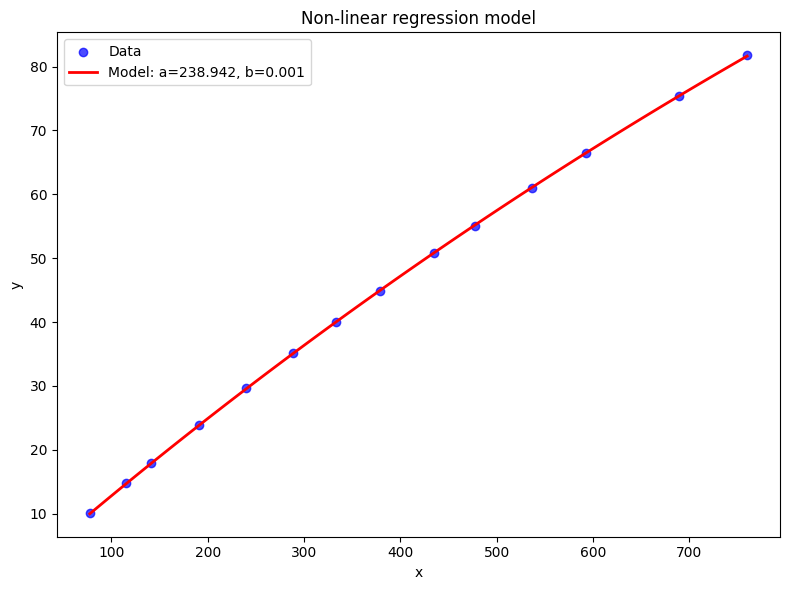

Optimized parameters BoxBOD [a, b]: [209.14534346   0.57091754]


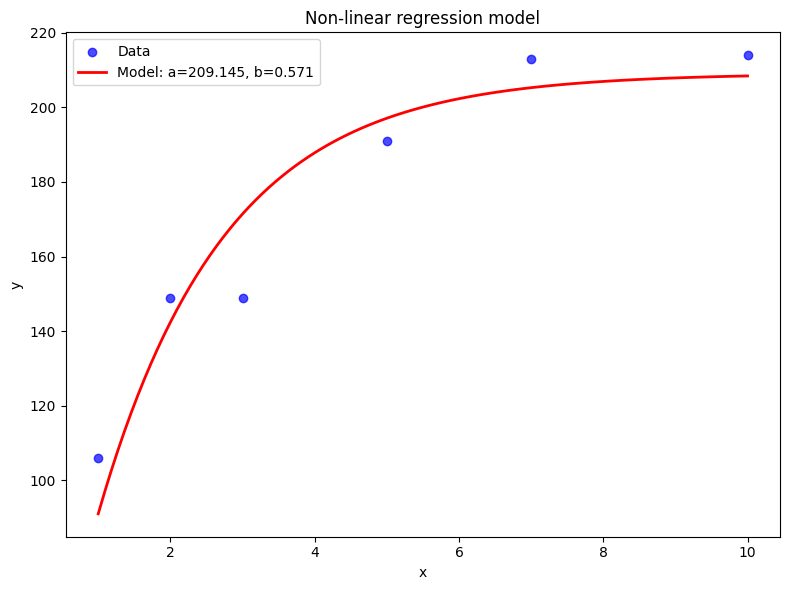

In [24]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

def load_misrala():
    path = "datasets/misrala.txt" if "google.colab" not in sys.modules else "/content/drive/MyDrive/2024_2025/PSM_2024_2025/Regression_1/Datasets/misrala.txt"
    return pd.read_csv(path, delimiter=" ")

def load_boxbod():
    path = "datasets/BoxBOD.txt" if "google.colab" not in sys.modules else "/content/drive/MyDrive/2024_2025/PSM_2024_2025/Regression_1/Datasets/BoxBOD.txt"
    return pd.read_csv(path, delimiter=" ")

def nonlinear_model(x, a, b):
    return a * (1 - np.exp(-b * x))

def fit_nonlinear_regression(x, y):
    initial_guess = [np.max(y), 0.001]
    optimized_parameters, _ = curve_fit(nonlinear_model, x, y, p0=initial_guess)
    return optimized_parameters

def plot_nonlinear_regression(x, y, popt, filename = "3_nonlinear_model.png") -> None:
    x_grid = np.linspace(x.min(), x.max(), 100)
    y_fit = nonlinear_model(x_grid, *popt)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data", color="blue", alpha=0.7)
    plt.plot(x_grid, y_fit, label=f"Model: a={popt[0]:.3f}, b={popt[1]:.3f}", color="red", lw=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Non-linear regression model")
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

misrala = load_misrala()
boxbod = load_boxbod()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=misrala.iloc[:, 0], y=misrala.iloc[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data misrala")
plt.subplot(1, 2, 2)
sns.scatterplot(x=boxbod.iloc[:, 0], y=boxbod.iloc[:, 1])
plt.xlabel("x1")
plt.ylabel("y1")
plt.title("Data BoxBOD")

x_misrala = misrala.iloc[:, 0].values
y_misrala = misrala.iloc[:, 1].values
optimized_parameters_misrala = fit_nonlinear_regression(x_misrala, y_misrala)
print("Optimized parameters misrala [a, b]:", optimized_parameters_misrala)
plot_nonlinear_regression(x_misrala, y_misrala, optimized_parameters_misrala, filename="3_misrala.png")

x_boxbod = boxbod.iloc[:, 0].values
y_boxbod = boxbod.iloc[:, 1].values
optimized_parameters_boxbod = fit_nonlinear_regression(x_boxbod, y_boxbod)
print("Optimized parameters BoxBOD [a, b]:", optimized_parameters_boxbod)
plot_nonlinear_regression(x_boxbod, y_boxbod, optimized_parameters_boxbod, filename="3_boxbod.png")